<a href="https://colab.research.google.com/github/sberniz/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/Santiago_berniz_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [108]:
from pathlib import Path
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam, Adadelta, Adamax, Ftrl, Nadam


In [38]:
import numpy as np

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [39]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X = X.astype('float32') / 255.

  return train_test_split(X,y,test_size=0.2, train_size=0.8, random_state=42)

In [40]:
X_train, X_test, y_train, y_test = load_quickdraw10('quickdraw10.npz')

In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [42]:
##### Your Code Here #####

def create_model(lr=0.1,opt=SGD):
  optimizer = opt(learning_rate=lr)
  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')

      ]
  )
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [60]:
default_model = create_model()
batch_default_32 = default_model.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7641 - accuracy: 0.7646 - val_loss: 0.6244 - val_accuracy: 0.8110
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5760 - accuracy: 0.8258 - val_loss: 0.5642 - val_accuracy: 0.8263
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5286 - accuracy: 0.8392 - val_loss: 0.5350 - val_accuracy: 0.8394
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.8477 - val_loss: 0.5158 - val_accuracy: 0.8444
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4801 - accuracy: 0.8540 - val_loss: 0.5112 - val_accuracy: 0.8435
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4652 - accuracy: 0.8583 - val_loss: 0.5107 - val_accuracy: 0.8454
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4535 - accuracy: 0.8613 - val_loss: 0.5109 - val_accuracy:

In [61]:
model_small_5 = create_model()
batch_small_5 = model_small_5.fit(X_train,y_train, epochs=30,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/30
16000/16000 [==============================] - 30s 2ms/step - loss: 0.7817 - accuracy: 0.7609 - val_loss: 0.6655 - val_accuracy: 0.8094
Epoch 2/30
16000/16000 [==============================] - 29s 2ms/step - loss: 0.6475 - accuracy: 0.8057 - val_loss: 0.6403 - val_accuracy: 0.8066
Epoch 3/30
16000/16000 [==============================] - 30s 2ms/step - loss: 0.6182 - accuracy: 0.8141 - val_loss: 0.6406 - val_accuracy: 0.8081
Epoch 4/30
16000/16000 [==============================] - 29s 2ms/step - loss: 0.6024 - accuracy: 0.8206 - val_loss: 0.6496 - val_accuracy: 0.8138
Epoch 5/30
16000/16000 [==============================] - 30s 2ms/step - loss: 0.5846 - accuracy: 0.8247 - val_loss: 0.6218 - val_accuracy: 0.8163
Epoch 6/30
16000/16000 [==============================] - 30s 2ms/step - loss: 0.5777 - accuracy: 0.8255 - val_loss: 0.6274 - val_accuracy: 0.8208
Epoch 7/30
16000/16000 [==============================] - 29s 2ms/step - loss: 0.5698 - accuracy: 0.8292 - val_loss: 0

In [62]:
model_medium_21 = create_model()
batch_medium_21 = model_medium_21.fit(X_train,y_train, epochs=30,batch_size=21,validation_data=(X_test,y_test))

Epoch 1/30
3810/3810 [==============================] - 9s 2ms/step - loss: 0.7449 - accuracy: 0.7698 - val_loss: 0.6276 - val_accuracy: 0.8083
Epoch 2/30
3810/3810 [==============================] - 8s 2ms/step - loss: 0.5697 - accuracy: 0.8267 - val_loss: 0.6135 - val_accuracy: 0.8099
Epoch 3/30
3810/3810 [==============================] - 9s 2ms/step - loss: 0.5226 - accuracy: 0.8400 - val_loss: 0.5440 - val_accuracy: 0.8345
Epoch 4/30
3810/3810 [==============================] - 8s 2ms/step - loss: 0.4955 - accuracy: 0.8471 - val_loss: 0.5431 - val_accuracy: 0.8336
Epoch 5/30
3810/3810 [==============================] - 8s 2ms/step - loss: 0.4784 - accuracy: 0.8530 - val_loss: 0.5180 - val_accuracy: 0.8421
Epoch 6/30
3810/3810 [==============================] - 9s 2ms/step - loss: 0.4646 - accuracy: 0.8569 - val_loss: 0.5139 - val_accuracy: 0.8433
Epoch 7/30
3810/3810 [==============================] - 8s 2ms/step - loss: 0.4542 - accuracy: 0.8597 - val_loss: 0.5187 - val_accuracy:

In [63]:
model_medium_large_300 = create_model()
batch_medium_large_300 = model_medium_large_300.fit(X_train,y_train, epochs=30,batch_size=300,validation_data=(X_test,y_test))

Epoch 1/30
267/267 [==============================] - 1s 3ms/step - loss: 1.1379 - accuracy: 0.6497 - val_loss: 0.8475 - val_accuracy: 0.7466
Epoch 2/30
267/267 [==============================] - 1s 3ms/step - loss: 0.7967 - accuracy: 0.7647 - val_loss: 0.7617 - val_accuracy: 0.7770
Epoch 3/30
267/267 [==============================] - 1s 3ms/step - loss: 0.7173 - accuracy: 0.7904 - val_loss: 0.7034 - val_accuracy: 0.7890
Epoch 4/30
267/267 [==============================] - 1s 3ms/step - loss: 0.6662 - accuracy: 0.8034 - val_loss: 0.6537 - val_accuracy: 0.8076
Epoch 5/30
267/267 [==============================] - 1s 3ms/step - loss: 0.6289 - accuracy: 0.8140 - val_loss: 0.6304 - val_accuracy: 0.8137
Epoch 6/30
267/267 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.8231 - val_loss: 0.6238 - val_accuracy: 0.8127
Epoch 7/30
267/267 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.8293 - val_loss: 0.6008 - val_accuracy: 0.8184
Epoch 

In [64]:
model_large_512 = create_model()
batch_large_512 = model_large_512.fit(X_train,y_train, epochs=30,batch_size=512,validation_data=(X_test,y_test))

Epoch 1/30
157/157 [==============================] - 1s 4ms/step - loss: 1.2631 - accuracy: 0.6078 - val_loss: 0.9310 - val_accuracy: 0.7218
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.7433 - val_loss: 0.8873 - val_accuracy: 0.7224
Epoch 3/30
157/157 [==============================] - 1s 3ms/step - loss: 0.7842 - accuracy: 0.7685 - val_loss: 0.7610 - val_accuracy: 0.7782
Epoch 4/30
157/157 [==============================] - 1s 3ms/step - loss: 0.7337 - accuracy: 0.7841 - val_loss: 0.7512 - val_accuracy: 0.7763
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.7952 - val_loss: 0.7136 - val_accuracy: 0.7886
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.8041 - val_loss: 0.6631 - val_accuracy: 0.8051
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.8122 - val_loss: 0.6623 - val_accuracy: 0.8043
Epoch 

In [65]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_default_32,batch_small_5, batch_medium_21,batch_medium_large_300, batch_large_512], ["32_", "5_","21_","300_","512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.764104,0.764637,0.624442,0.81105,0,32_
1,0.575955,0.825800,0.564246,0.82625,1,32_
2,0.528588,0.839163,0.534969,0.83940,2,32_
3,0.499833,0.847700,0.515823,0.84440,3,32_
4,0.480090,0.854038,0.511203,0.84345,4,32_


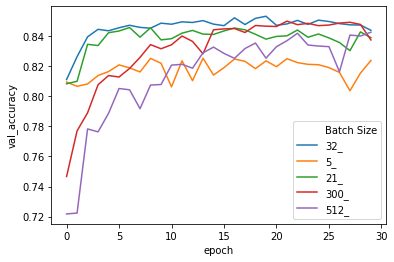

In [66]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

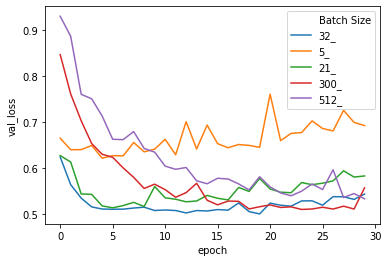

In [67]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

Batch Size of 32 perform the best  wand comparable to yesterday's assignment within the 84 accuracy

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [68]:
default_model_lr1 = create_model(lr=1)
batch_default_32_lr1 = default_model_lr1.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8688 - accuracy: 0.2770 - val_loss: 2.2450 - val_accuracy: 0.1373
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9497 - accuracy: 0.2157 - val_loss: 1.9056 - val_accuracy: 0.2323
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0101 - accuracy: 0.1916 - val_loss: 1.9881 - val_accuracy: 0.1809
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0269 - accuracy: 0.1815 - val_loss: 2.0209 - val_accuracy: 0.1883
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0109 - accuracy: 0.1850 - val_loss: 1.9862 - val_accuracy: 0.1931
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0075 - accuracy: 0.1849 - val_loss: 1.9844 - val_accuracy: 0.1885
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9993 - accuracy: 0.1846 - val_loss: 2.0002 - val_accuracy:

In [69]:
default_model_lr0_1 = create_model(lr=0.1)
batch_default_32_lr0_1 = default_model_lr0_1.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7789 - accuracy: 0.7594 - val_loss: 0.6102 - val_accuracy: 0.8179
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5806 - accuracy: 0.8240 - val_loss: 0.5727 - val_accuracy: 0.8260
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5308 - accuracy: 0.8385 - val_loss: 0.5335 - val_accuracy: 0.8372
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8483 - val_loss: 0.5322 - val_accuracy: 0.8375
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4771 - accuracy: 0.8546 - val_loss: 0.5435 - val_accuracy: 0.8351
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4626 - accuracy: 0.8579 - val_loss: 0.5091 - val_accuracy: 0.8443
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4503 - accuracy: 0.8611 - val_loss: 0.5038 - val_accuracy:

In [70]:
default_model_lr0_01 = create_model(lr=0.01)
batch_default_32_lr0_01 = default_model_lr0_01.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1796 - accuracy: 0.6304 - val_loss: 0.8700 - val_accuracy: 0.7443
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8226 - accuracy: 0.7568 - val_loss: 0.7772 - val_accuracy: 0.7747
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7433 - accuracy: 0.7805 - val_loss: 0.7196 - val_accuracy: 0.7883
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6880 - accuracy: 0.7951 - val_loss: 0.6778 - val_accuracy: 0.7998
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6475 - accuracy: 0.8086 - val_loss: 0.6462 - val_accuracy: 0.8080
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6164 - accuracy: 0.8165 - val_loss: 0.6212 - val_accuracy: 0.8138
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5930 - accuracy: 0.8231 - val_loss: 0.6043 - val_accuracy:

In [75]:
default_model_lr0_001 = create_model(lr=0.001)
batch_default_32_lr0_001 = default_model_lr0_001.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1317 - accuracy: 0.2672 - val_loss: 1.8837 - val_accuracy: 0.4065
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6167 - accuracy: 0.4896 - val_loss: 1.4143 - val_accuracy: 0.5601
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3022 - accuracy: 0.5993 - val_loss: 1.2123 - val_accuracy: 0.6277
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1475 - accuracy: 0.6483 - val_loss: 1.0921 - val_accuracy: 0.6651
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0487 - accuracy: 0.6823 - val_loss: 1.0116 - val_accuracy: 0.6944
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9811 - accuracy: 0.7057 - val_loss: 0.9556 - val_accuracy: 0.7138
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9334 - accuracy: 0.7223 - val_loss: 0.9160 - val_accuracy:

In [72]:
default_model_lr0_0001 = create_model(lr=0.0001)
batch_default_32_lr0_0001 = default_model_lr0_0001.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3544 - accuracy: 0.0753 - val_loss: 2.3326 - val_accuracy: 0.0912
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3158 - accuracy: 0.1039 - val_loss: 2.2999 - val_accuracy: 0.1230
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2847 - accuracy: 0.1380 - val_loss: 2.2696 - val_accuracy: 0.1592
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2532 - accuracy: 0.1744 - val_loss: 2.2368 - val_accuracy: 0.1931
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2179 - accuracy: 0.2115 - val_loss: 2.1992 - val_accuracy: 0.2300
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1767 - accuracy: 0.2513 - val_loss: 2.1544 - val_accuracy: 0.2711
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1279 - accuracy: 0.2951 - val_loss: 2.1019 - val_accuracy:

In [104]:
learning_rates = []

for exp_lr, result_lr in zip([batch_default_32_lr1, batch_default_32_lr0_1,
                        batch_default_32_lr0_01, batch_default_32_lr0_001, batch_default_32_lr0_0001], ["1_", "0_1_","0_01_","0_001_","0_0001_"]):

  dflr = pd.DataFrame.from_dict(exp_lr.history)
  dflr['epoch'] = dflr.index.values
  dflr['learning_rate'] = result_lr

  learning_rates.append(dflr)

dflr = pd.concat(learning_rates)
dflr['learning_rate'] = dflr['learning_rate'].astype('str')
dflr.head()

,loss,accuracy,val_loss,val_accuracy,epoch,learning_rate
0,1.868795,0.277025,2.245016,0.13735,0,1_
1,1.949716,0.215750,1.905629,0.23230,1,1_
2,2.010080,0.191638,1.988125,0.18090,2,1_
3,2.026944,0.181513,2.020890,0.18825,3,1_
4,2.010855,0.185000,1.986241,0.19315,4,1_


In [105]:
dflr['learning_rate'].value_counts()

1_         30
0_0001_    30
0_1_       30
0_01_      30
0_001_     30
Name: learning_rate, dtype: int64

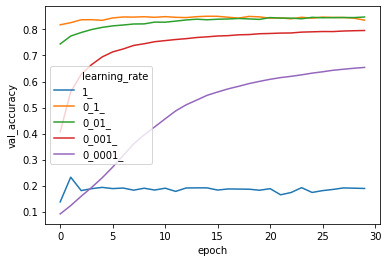

In [106]:
sns.lineplot(x='epoch', y='val_accuracy', hue='learning_rate', data=dflr);

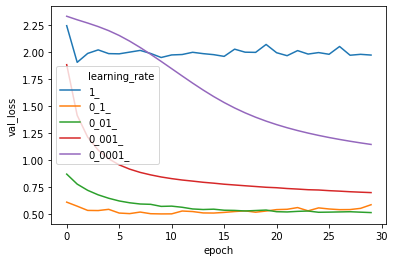

In [107]:
sns.lineplot(x='epoch', y='val_loss', hue='learning_rate', data=dflr);

learning rate of 0.01 perform the rest, also within the .85 accuracy similar to yesterday's assignment.. all models chosen today were very close in accuracy. to the default. and some performing worst. 

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [115]:
default_model_lr0_01_SGD = create_model(lr=0.01,opt=SGD)
batch_default_32_lr0_01_SGD = default_model_lr0_01_SGD.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2217 - accuracy: 0.6177 - val_loss: 0.8703 - val_accuracy: 0.7417
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8193 - accuracy: 0.7595 - val_loss: 0.7682 - val_accuracy: 0.7732
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7422 - accuracy: 0.7812 - val_loss: 0.7168 - val_accuracy: 0.7894
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.7972 - val_loss: 0.6853 - val_accuracy: 0.7966
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6577 - accuracy: 0.8078 - val_loss: 0.6548 - val_accuracy: 0.8048
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6273 - accuracy: 0.8170 - val_loss: 0.6307 - val_accuracy: 0.8152
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6027 - accuracy: 0.8245 - val_loss: 0.6166 - val_accuracy:

In [109]:
default_model_lr0_01_NADAM = create_model(lr=0.01,opt=Nadam)
batch_default_32_lr0_01_NADAM = default_model_lr0_01_NADAM.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.7397 - accuracy: 0.7766 - val_loss: 0.6677 - val_accuracy: 0.8041
Epoch 2/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6283 - accuracy: 0.8147 - val_loss: 0.6268 - val_accuracy: 0.8120
Epoch 3/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5975 - accuracy: 0.8220 - val_loss: 0.6009 - val_accuracy: 0.8205
Epoch 4/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5832 - accuracy: 0.8266 - val_loss: 0.6327 - val_accuracy: 0.8175
Epoch 5/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5774 - accuracy: 0.8294 - val_loss: 0.5990 - val_accuracy: 0.8241
Epoch 6/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5670 - accuracy: 0.8342 - val_loss: 0.6075 - val_accuracy: 0.8203
Epoch 7/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5621 - accuracy: 0.8339 - val_loss: 0.6355 - val_accuracy:

In [110]:
default_model_lr0_01_ADAM = create_model(lr=0.01,opt=Adam)
batch_default_32_lr0_01_ADAM= default_model_lr0_01_ADAM.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7493 - accuracy: 0.7715 - val_loss: 0.6778 - val_accuracy: 0.7964
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6443 - accuracy: 0.8071 - val_loss: 0.6425 - val_accuracy: 0.8078
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6222 - accuracy: 0.8143 - val_loss: 0.6232 - val_accuracy: 0.8142
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6068 - accuracy: 0.8195 - val_loss: 0.6763 - val_accuracy: 0.8031
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5947 - accuracy: 0.8240 - val_loss: 0.6436 - val_accuracy: 0.8104
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5838 - accuracy: 0.8278 - val_loss: 0.6507 - val_accuracy: 0.8092
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5747 - accuracy: 0.8310 - val_loss: 0.6191 - val_accuracy:

In [111]:
default_model_lr0_01_ADADELTA = create_model(lr=0.01,opt=Adadelta)
batch_default_32_lr0_01_ADADELTA = default_model_lr0_01_ADADELTA.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0924 - accuracy: 0.2940 - val_loss: 1.8561 - val_accuracy: 0.4155
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6498 - accuracy: 0.4693 - val_loss: 1.4787 - val_accuracy: 0.5155
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3685 - accuracy: 0.5602 - val_loss: 1.2824 - val_accuracy: 0.6013
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2209 - accuracy: 0.6211 - val_loss: 1.1705 - val_accuracy: 0.6427
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1296 - accuracy: 0.6539 - val_loss: 1.0952 - val_accuracy: 0.6693
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0658 - accuracy: 0.6793 - val_loss: 1.0404 - val_accuracy: 0.6894
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0179 - accuracy: 0.6965 - val_loss: 0.9981 - val_accuracy:

In [112]:
default_model_lr0_01_ADAMAX = create_model(lr=0.01,opt=Adamax)

batch_default_32_lr0_01_ADAMAX = default_model_lr0_01_ADAMAX.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7255 - accuracy: 0.7808 - val_loss: 0.5831 - val_accuracy: 0.8226
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5629 - accuracy: 0.8307 - val_loss: 0.5590 - val_accuracy: 0.8338
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5229 - accuracy: 0.8416 - val_loss: 0.5383 - val_accuracy: 0.8364
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4949 - accuracy: 0.8507 - val_loss: 0.5213 - val_accuracy: 0.8429
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4797 - accuracy: 0.8543 - val_loss: 0.5199 - val_accuracy: 0.8429
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4647 - accuracy: 0.8596 - val_loss: 0.5200 - val_accuracy: 0.8389
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4523 - accuracy: 0.8614 - val_loss: 0.5174 - val_accuracy:

In [113]:
default_model_lr0_01_FTLR = create_model(lr=0.01,opt=Ftrl)
batch_default_32_lr0_01_FTLR = default_model_lr0_01_FTLR.fit(X_train,y_train, epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.0993
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3025 - val_accuracy: 0.0988
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1982 - accuracy: 0.1476 - val_loss: 2.0042 - val_accuracy: 0.2196
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6963 - accuracy: 0.3317 - val_loss: 1.4572 - val_accuracy: 0.4263
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3518 - accuracy: 0.4835 - val_loss: 1.2865 - val_accuracy:

In [116]:
optimizer_types = []
# batch_default_32_lr0_01_SGD
# batch_default_32_lr0_01_NADAM 
# batch_default_32_lr0_01_ADAM 
# batch_default_32_lr0_01_ADADELTA
# batch_default_32_lr0_01_ADAMAX
# batch_default_32_lr0_01_FTLR

for exp_opt, result_opt in zip([batch_default_32_lr0_01_SGD, batch_default_32_lr0_01_NADAM,
                                batch_default_32_lr0_01_ADAM, batch_default_32_lr0_01_ADADELTA,
                                batch_default_32_lr0_01_ADAMAX, batch_default_32_lr0_01_FTLR], ["SGD", "NADAM","ADAM",
                                                                                                "ADADELTA","ADAMAX","FTLR"]):

  dfopt = pd.DataFrame.from_dict(exp_opt.history)
  dfopt['epoch'] = dfopt.index.values
  dfopt['optimizer'] = result_opt

  optimizer_types.append(dfopt)

dfopt = pd.concat(optimizer_types)
dfopt['optimizer'] = dfopt['optimizer'].astype('str')
dfopt.head()

,loss,accuracy,val_loss,val_accuracy,epoch,optimizer
0,1.221651,0.617725,0.870266,0.74170,0,SGD
1,0.819254,0.759525,0.768164,0.77320,1,SGD
2,0.742198,0.781200,0.716752,0.78945,2,SGD
3,0.693310,0.797212,0.685350,0.79660,3,SGD
4,0.657655,0.807825,0.654765,0.80480,4,SGD


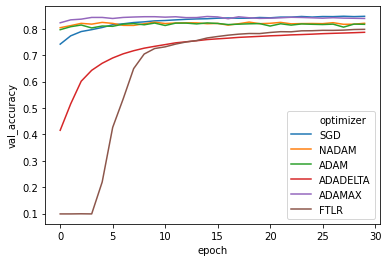

In [117]:
sns.lineplot(x='epoch', y='val_accuracy', hue='optimizer', data=dfopt);

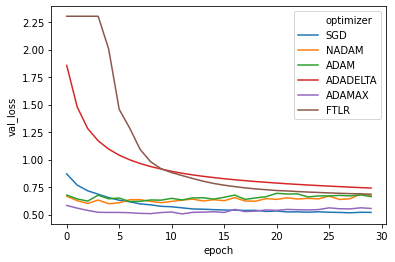

In [118]:
sns.lineplot(x='epoch', y='val_loss', hue='optimizer', data=dfopt);

sgd and ftlr perform best fora ccuracy. sgd and adamax where close together for minimal loss

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
back propagation in neural networks is when the it calculates the output and the error,and goes back to the neuron to change the weight to reduce error, goes back and forward for fine tunning 
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


